**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: MR4010 - Navegación Autónoma**

Tecnológico de Monterrey

Prof Dr. David Antonio Torres

**Semana 10 - Proyecto Final :**
Behavioral Cloning

---

**Integrantes Equipo 11 :**

|NOMBRE|MATRÍCULA|
|:--- | :--- |
|Luis Angel Oporto Añacato | A01794956 |
|Mario Jiménez García | A00561170 |
|Dalia Isabel López Tapia | A01245026 |
|Julio Osvaldo Hernández Bucio | A01794366 |

# EJERCICIO DE CLASIFICACIÓN CON KERAS

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DIR = "/content/drive/MyDrive/Colab Notebooks/TecMNA/MR4010_SDC/Modulo4/4.5.Actividad5"
os.chdir(DIR)

In [ ]:
import os
DIR = "C:/Users/LuisAngel/Downloads/TecMNA/MR4010 - Navegación Autónoma"
os.chdir(DIR)

In [ ]:
 # !pip install --upgrade keras
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/276.5 MB ? eta -:--:--
   ---------------------------------------- 0.2/276.5 MB 4.8 MB/s eta 0:00:58
   ---------------------------------------- 0.6/276.5 MB 5.9 MB/s eta 0:00:47
   ---------------------------------------- 0.8/276.5 MB 7.0 MB/s eta 0:00:40
   ---------------------------------------- 0.8/276.5 MB 4.6 MB/s eta 0:01:01
   ---------------------------------------- 1.8/276.5 MB 7.6 MB/s eta 0:00:37
   ---------------------------------------- 2.2/276.5 MB 7.7 MB/s eta 0:00:36
   ---------------------------------------- 2.6/276.5 MB 7.9 MB/s eta 0:00:35
   ---------------------------------------- 3.0/276.5 MB 7.7 MB/s eta 0:00:36
   ---------------------------------------- 3.3/276.5 MB 7.6 MB/s eta 0:00:37
  


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



   ---------------------------------------- 0.0/227.3 kB ? eta -:--:--
   ---------------------------------------  225.3/227.3 kB 6.9 MB/s eta 0:00:01
   ---------------------------------------  225.3/227.3 kB 6.9 MB/s eta 0:00:01
   ---------------------------------------- 227.3/227.3 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/181.2 kB ? eta -:--:--
   -------------------------------------- - 174.1/181.2 kB 5.3 MB/s eta 0:00:01
   -------------------------------------- - 174.1/181.2 kB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 181.2/181.2 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/151.7 kB ? eta -:--:--
   ------------------------------------- -- 143.4/151.7 kB 8.3 MB/s eta 0:00:01
   ---------------------------------------- 151.7/151.7 kB 1.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/85.3 kB ? eta -:--:--
   -------------------------------------- - 81.9/85.3 kB 4.8 MB/s eta 0:00:0

In [ ]:
!pip install imgaug

   ---------------------------------------- 0.0/948.0 kB ? eta -:--:--
   ---------------------------------------- 10.2/948.0 kB ? eta -:--:--
   --- ------------------------------------ 81.9/948.0 kB 1.1 MB/s eta 0:00:01
   ------------- -------------------------- 327.7/948.0 kB 2.9 MB/s eta 0:00:01
   ---------------------------- ----------- 665.6/948.0 kB 4.2 MB/s eta 0:00:01
   ---------------------------------------  942.1/948.0 kB 4.6 MB/s eta 0:00:01
   ---------------------------------------  942.1/948.0 kB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 948.0/948.0 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   --------- ------------------------------ 0.4/1.5 MB 11.2 MB/s eta 0:00:01
   ------------------------- -------------- 0.9/1.5 MB 11.6 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.5 MB 10.5 MB/s eta 0:00:01
   ---------------------------------------  1.5/1.5 MB 9.3 MB/s eta 0:00:01
  

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.optimizers import Adam

## 1. Carga de Datos - Imágenes Generadas

In [ ]:
# Se usará la librería "glob" para cargar imágenes
import glob

In [ ]:
# Cargamos datos de imágenes generadas
img_data = glob.glob(f"SDCG11/image_data/*.*")
df_data = pd.read_csv(f"SDCG11/image_data.csv")
df1 = pd.read_csv(f"SDCG11/Images01/image_data.csv")
df2 = pd.read_csv(f"SDCG11/Images02/image_data.csv")
df_data = pd.concat([df_data, df1, df2], ignore_index=True)

# Imprimimos cantidad de imágenes disponibles
print("Imágenes disponibles:", len(img_data))
print(df_data.shape)

Imágenes disponibles: 24595
(27769, 2)


In [ ]:
# determinamos si las imagenes existen en path
exist_image = df_data['Image Name'].apply(lambda x: os.path.isfile(f"SDCG11/image_data/{x}"))

# filtramos el DataFrame con las imagenes existentes
df_data = df_data[exist_image]

In [ ]:
# Imprimimos cantidad de imágenes disponibles
print("Imágenes disponibles:", len(img_data))
print(df_data.shape)

Imágenes disponibles: 24595
(24909, 2)


In [ ]:
# Agrupamos para eliminar nombres duplicados
df_data = df_data.groupby(['Image Name'], as_index=False).mean()

# Renombramos las columnas
df_data.columns = ['image_name', 'steering_angle']

In [ ]:
# Imprimimos cantidad de imágenes disponibles
print("Imágenes disponibles:", len(img_data))
print(df_data.shape)

Imágenes disponibles: 24595
(24595, 2)


In [ ]:
df_data

,image_name,steering_angle
0,2024-06-20 19-00-34.66.png,0.00
1,2024-06-20 19-00-34.74.png,0.00
2,2024-06-20 19-00-34.80.png,0.00
3,2024-06-20 19-00-34.87.png,0.00
4,2024-06-20 19-00-34.93.png,0.00
...,...,...
24590,2024-06-22 15-08-00.67.png,0.04
24591,2024-06-22 15-08-00.70.png,0.04
24592,2024-06-22 15-08-00.76.png,0.04
24593,2024-06-22 15-08-00.80.png,0.04


## 2. Paparación de Datos de Imágenes

### 2.1 Datos de Entrenamiento y Validación

<BarContainer object of 25 artists>

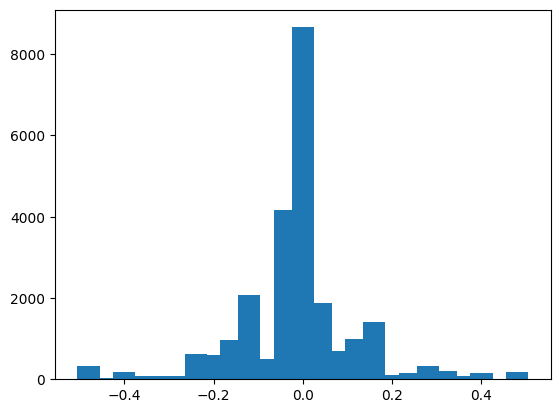

In [ ]:
# Distribución de frecuencia de ángulos de giro
num_bins = 25

# Graficamos la Distribución de frecuencia de ángulos de giro
hist, bins = np.histogram(df_data.steering_angle, num_bins)
center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)

In [ ]:
# Dividimos datos de imágenes
X = list(df_data.image_name)
y = list(df_data.steering_angle)

# Dividimos en datos de entrenamiento y validación
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Imprimimos cantidades de datos de entrenamiento y validación
print("Datos de Entrenamiento:", len(X_train))
print("Datos de Entrenamiento:", len(X_valid))

Datos de Entrenamiento: 17216
Datos de Entrenamiento: 7379


### 2.2 Image Augmentation

In [ ]:
# Aplicar Zoom a imagen
def img_zoom(image):
    zoom = iaa.Affine(scale=(1,1.3))
    image = zoom.augment_image(image)

    return image

# Aplicar imagen movida
def img_pan(image):
    pan = iaa.Affine(translate_percent={'x':(-0.05,0.05), 'y':(-0.05,0.05)})
    image = pan.augment_image(image)

    return image

# Aplicar brillo a imagen
def img_brightness(image):
    brightness = iaa.Multiply((0.2,1.2))
    image = brightness.augment_image(image)

    return image

# Aplicar rotación de 180° a imagen
def img_flip(image, steering_angle):
    image = cv2.flip(image, 1)
    steering_angle = -steering_angle

    return image, steering_angle

# Aplicar técnica "augmentation" aleatoria
def random_augment(image_path, steering_angle):
    image_path = f"SDCG11/image_data/{image_path}"
    # image = mpimg.imread(image_path)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    if np.random.rand() < 0.5:
        image = img_zoom(image)
    if np.random.rand() < 0.5:
        image = img_pan(image)
    if np.random.rand() < 0.5:
        image = img_brightness(image)
    if (np.random.rand() < 0.5):
        image, steering_angle = img_flip(image, steering_angle)

    return image, steering_angle

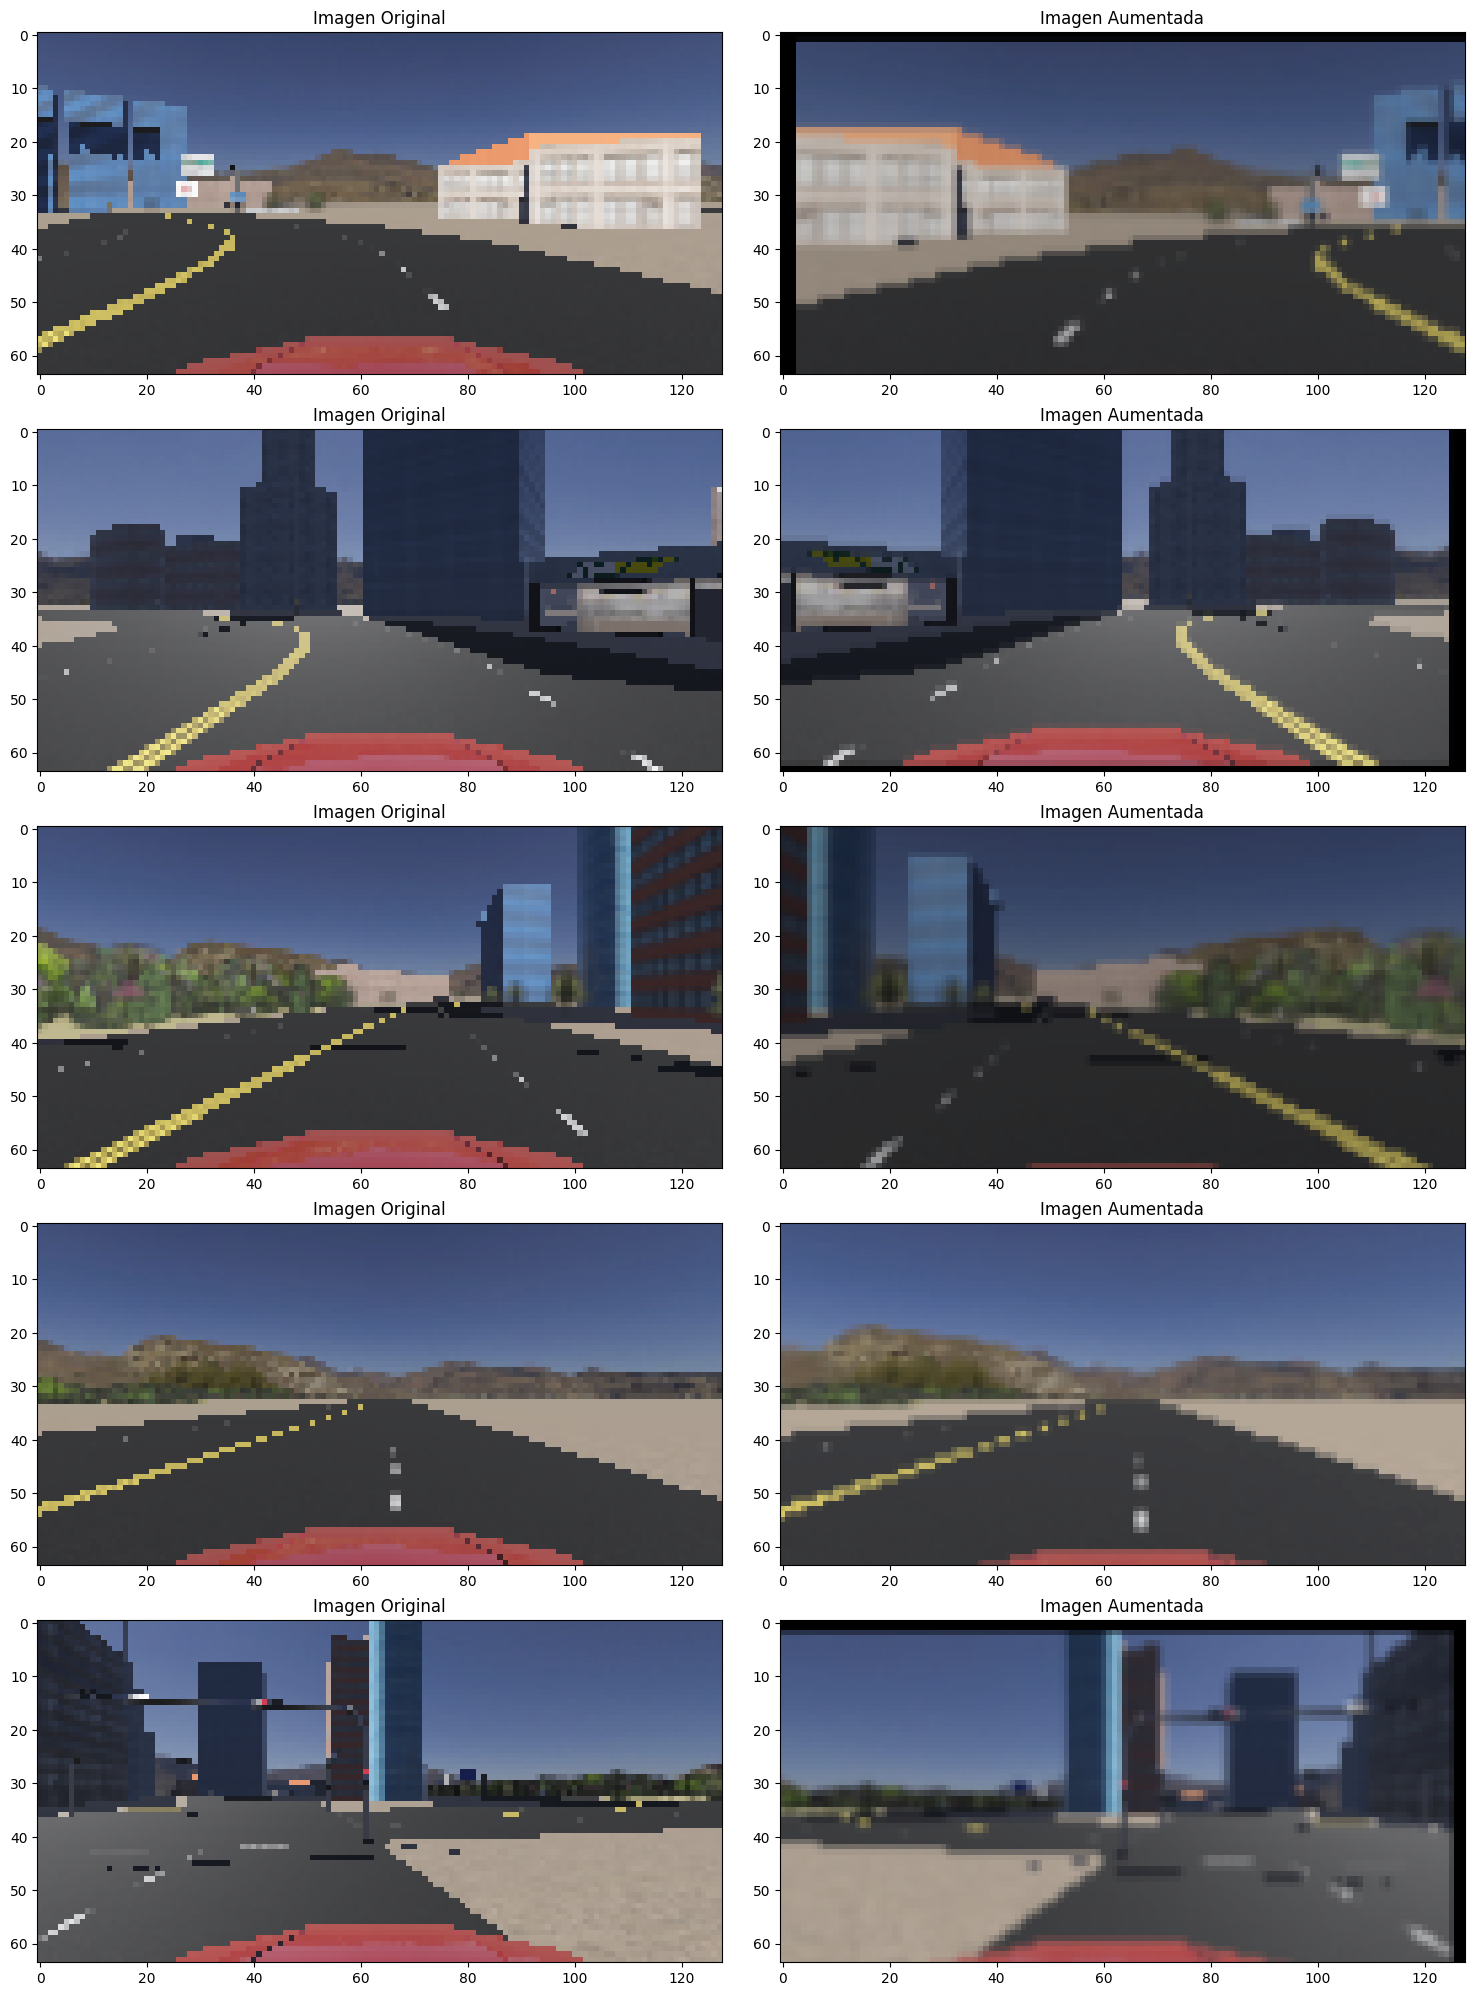

In [ ]:
# Mostramos imágenes de muestra aplicando técnicas de Augmentation
fig, axs = plt.subplots(5, 2, figsize=(15,20))
fig.tight_layout()

for i in range(5):
    rand_num = random.randint(0, len(X) - 1)
    # random_image = f"SDCG11/image_data/{X[rand_num]}"
    random_image = X[rand_num]
    random_steering = y[rand_num]

    # original_image = mpimg.imread(random_image)
    original_image = cv2.imread(f"SDCG11/image_data/{random_image}")
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    augmented_image, augmented_steering = random_augment(random_image, random_steering)

    axs[i][0].imshow(original_image)
    axs[i][0].set_title("Imagen Original")

    axs[i][1].imshow(augmented_image)
    axs[i][1].set_title("Imagen Aumentada")

### 2.3 Preprocesamiento de Imágenes

In [ ]:
# Función de preprocesamiento de imágenes
def img_preprocess(image):
    img = image[30:58,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img, (3,3), 0)
    img = cv2.resize(img, (128, 32))
    img = img/255

    return img

(64, 128, 3)


Text(0.5, 1.0, 'Imagen Preprocesada')

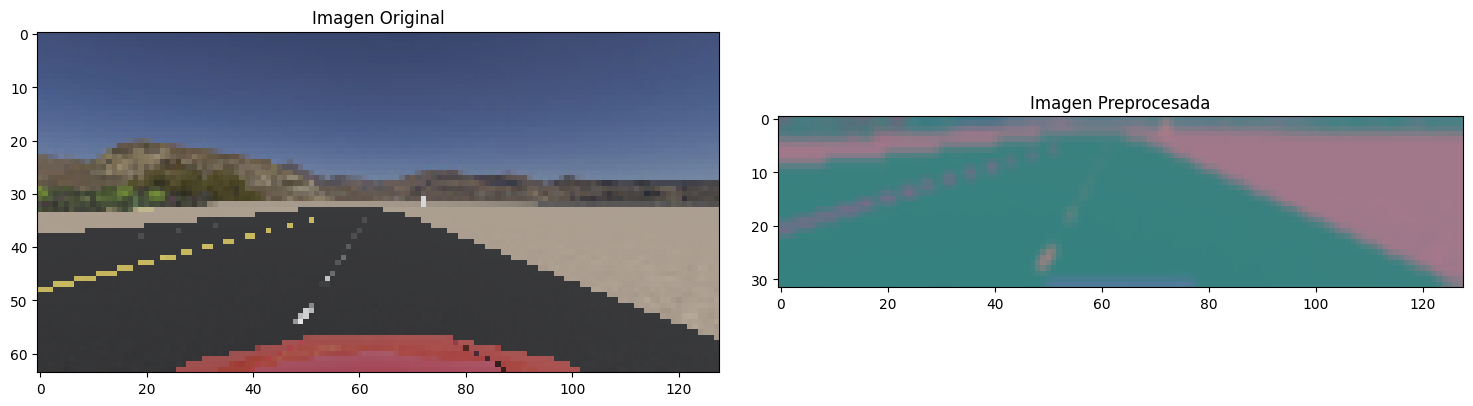

In [ ]:
# Mostramos una imagen luego de aplicar el preprocesamiento
image_path = f"SDCG11/image_data/{X[random.randint(0, len(X)-1)]}"
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
print(original_image.shape)
preprocessed_image = img_preprocess(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 4))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title("Imagen Original")
axs[1].imshow(preprocessed_image)
axs[1].set_title("Imagen Preprocesada")

In [ ]:
# Generador de grupos/lotes de datos
def batch_generator(image_paths, steering_angles, batch_size, is_training):
    while True:
        batch_img = []
        batch_steering = []
        for i in range(batch_size):
            random_index = random.randint(0, len(image_paths)-1)
            if is_training:
                img, steering = random_augment(image_paths[random_index], steering_angles[random_index])
            else:
                img_path = f"SDCG11/image_data/{image_paths[random_index]}"
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                steering = steering_angles[random_index]
            img = img_preprocess(img)
            batch_img.append(img)
            batch_steering.append(steering)

        yield (np.asarray(batch_img), np.asarray(batch_steering))

Text(0.5, 1.0, 'Imagen de Validación (-0.02)')

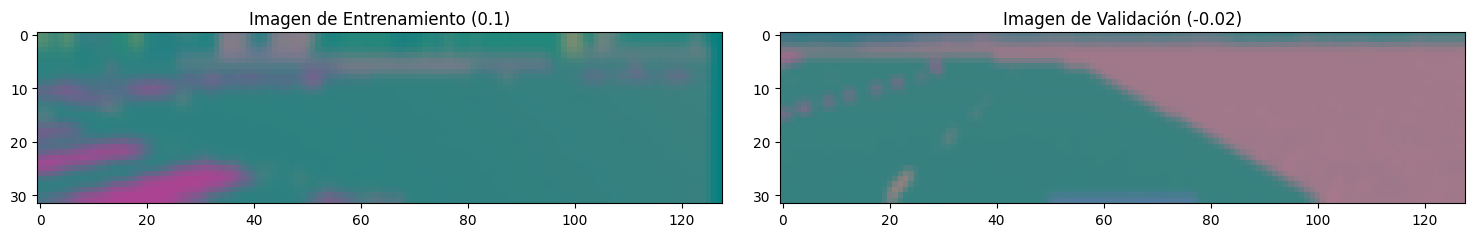

In [ ]:
# Probamos el generador de lotes de datos
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, True))
x_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, 1, False))

fig, axs = plt.subplots(1, 2, figsize=(15, 3))
fig.tight_layout()

axs[0].imshow(x_train_gen[0])
axs[0].set_title(f"Imagen de Entrenamiento ({y_train_gen[0]})")

axs[1].imshow(x_valid_gen[0])
axs[1].set_title(f"Imagen de Validación ({y_valid_gen[0]})")

## 6. Contruimos Red Convolucional con Keras y Entrenamos

In [ ]:
from tensorflow.keras.layers import Convolution2D, Dropout, Flatten, Dense
from tensorflow.keras import Sequential

In [ ]:
# Construyendo nuestra Red Convolucional
def nvidia_model():
    model = Sequential()

    model.add(Convolution2D(filters=24, kernel_size=(3,3), strides=(2,2), input_shape=(32, 128, 3), activation='elu'))
    model.add(Convolution2D(filters=32, kernel_size=(3,3), strides=(2,2), activation='elu'))
    model.add(Convolution2D(filters=48, kernel_size=(3,3), strides=(2,2), activation='elu'))
    model.add(Dropout(0.25))

    model.add(Convolution2D(filters=64, kernel_size=(3,3), activation='elu' ))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units=1))

    optimizer = Adam(learning_rate=1e-4)
    model.compile(optimizer='adam', loss='mse')

    return model

In [ ]:
model = nvidia_model()
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 15, 63, 24)        672       
                                                                 
 conv2d_28 (Conv2D)          (None, 7, 31, 32)         6944      
                                                                 
 conv2d_29 (Conv2D)          (None, 3, 15, 48)         13872     
                                                                 
 dropout_11 (Dropout)        (None, 3, 15, 48)         0         
                                                                 
 conv2d_30 (Conv2D)          (None, 1, 13, 64)         27712     
                                                                 
 dropout_12 (Dropout)        (None, 1, 13, 64)         0         
                                                                 
 flatten_3 (Flatten)         (None, 832)              

In [ ]:
history = model.fit_generator(generator=batch_generator(X_train, y_train, 256, True),
                             steps_per_epoch=300, epochs=25,
                             validation_data=batch_generator(X_valid, y_valid, 128, False),
                             validation_steps=200, verbose=1, shuffle=True)


C:\Users\LuisAngel\AppData\Local\Temp\ipykernel_1356\3720968161.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=batch_generator(X_train, y_train, 256, True),


Epoch 1/25
300/300 [==============================] - 532s 2s/step - loss: 0.0191 - val_loss: 0.0154
Epoch 2/25
300/300 [==============================] - 540s 2s/step - loss: 0.0173 - val_loss: 0.0107
Epoch 3/25
300/300 [==============================] - 511s 2s/step - loss: 0.0151 - val_loss: 0.0090
Epoch 4/25
300/300 [==============================] - 518s 2s/step - loss: 0.0136 - val_loss: 0.0079
Epoch 5/25
300/300 [==============================] - 533s 2s/step - loss: 0.0124 - val_loss: 0.0058
Epoch 6/25
300/300 [==============================] - 543s 2s/step - loss: 0.0113 - val_loss: 0.0050
Epoch 7/25
300/300 [==============================] - 526s 2s/step - loss: 0.0105 - val_loss: 0.0046
Epoch 8/25
300/300 [==============================] - 525s 2s/step - loss: 0.0095 - val_loss: 0.0033
Epoch 9/25
300/300 [==============================] - 509s 2s/step - loss: 0.0091 - val_loss: 0.0031
Epoch 10/25
300/300 [==============================] - 514s 2s/step - loss: 0.0084 - val_lo

Text(0.5, 0, 'Epoca')

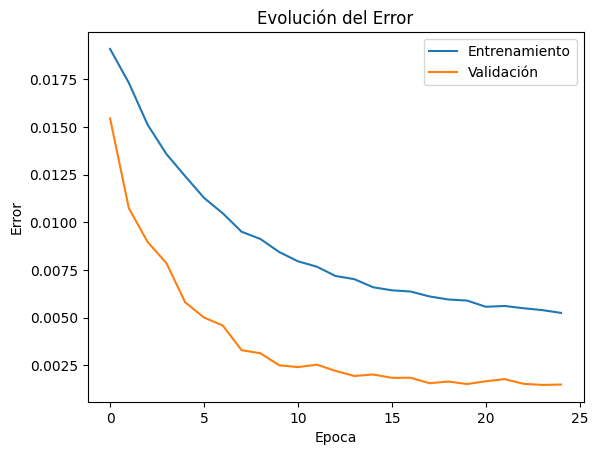

In [ ]:
# Graficamos la Función de pérdida
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Evolución del Error')
plt.legend(['Entrenamiento', 'Validación'])
plt.ylabel('Error')
plt.xlabel('Epoca')

In [ ]:
# Guardamos el modelo
model.save('sdcg11_model_v1.h5')

In [ ]:
from tensorflow.keras.models import load_model, save_model, model_from_json

In [ ]:
from tensorflow.keras.models import load_model

save_model(model, 'sdcg11_model_v1.h5', save_format='h5')

C:\Users\LuisAngel\AppData\Local\Temp\ipykernel_1356\1316762552.py:3: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, 'sdcg11_model_v1.h5', save_format='h5')


In [ ]:
import json

model_json = model.to_json()
with open("sdcg11_model_v1.json", "w") as json_file:
    json_file.write(json.dumps(json.loads(model_json), indent=4))

In [ ]:
model.save_weights('sdcg11_model_weights_v1.h5')

In [ ]:
model_v1 = nvidia_model()
model_v1.load_weights('sdcg11_model_weights_v1.h5')

In [ ]:
image_path = f"SDCG11/image_data/{X_valid[0]}"
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
model_v1.predict(np.asarray([img_preprocess(img)]))

1/1 [==============================] - 0s 281ms/step


array([[0.08224367]], dtype=float32)

In [ ]:
json_file = open("sdcg11_model_v1.json", 'r')
loaded_model_json = json_file.read()
json_file.close()
model_v11 = model_from_json(loaded_model_json)
model_v11.load_weights('sdcg11_model_weights_v1.h5')

In [ ]:
model_v11.predict(np.asarray([img_preprocess(img)]))

1/1 [==============================] - 0s 190ms/step


array([[0.08224367]], dtype=float32)

In [ ]:
y_valid[0]

0.12